In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeSingularA(3, 2, delta = .00010)

[[0.31104847 0.13537614 0.55327545]
 [0.48296726 0.09431855 0.42241425]
 [0.5307496  0.15685098 0.31209949]]


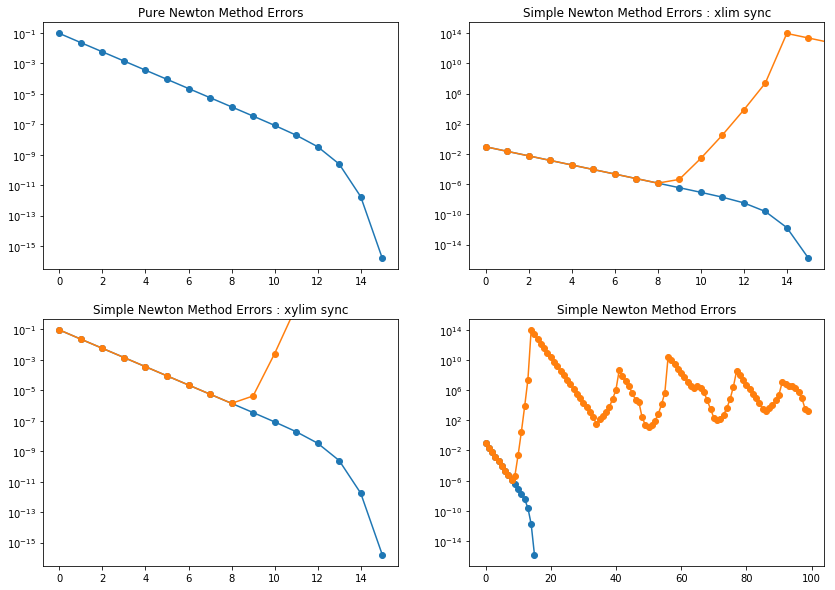

In [3]:
Ss = shf.NewtonPoly(A)
ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 10 * np.eye(3))
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')

ax2.semilogy(Ss['errs'],'-o')
ax2.semilogy(ss['errs'],'-o')
ax2.set_xlim(ax1.get_xlim())
ax2.set_title('Simple Newton Method Errors : xlim sync')

ax3.semilogy(Ss['errs'],'-o')
ax3.semilogy(ss['errs'],'-o')
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())
ax3.set_title('Simple Newton Method Errors : xylim sync')

ax4.semilogy(Ss['errs'],'-o')
ax4.semilogy(ss['errs'],'-o')
ax4.set_title('Simple Newton Method Errors')

print(Ss['sol'])

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)

# for i in range(len(Ds)):
#     print(Ds[i])
#     print(EVs[i])

In [5]:
coeffi = np.zeros((Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

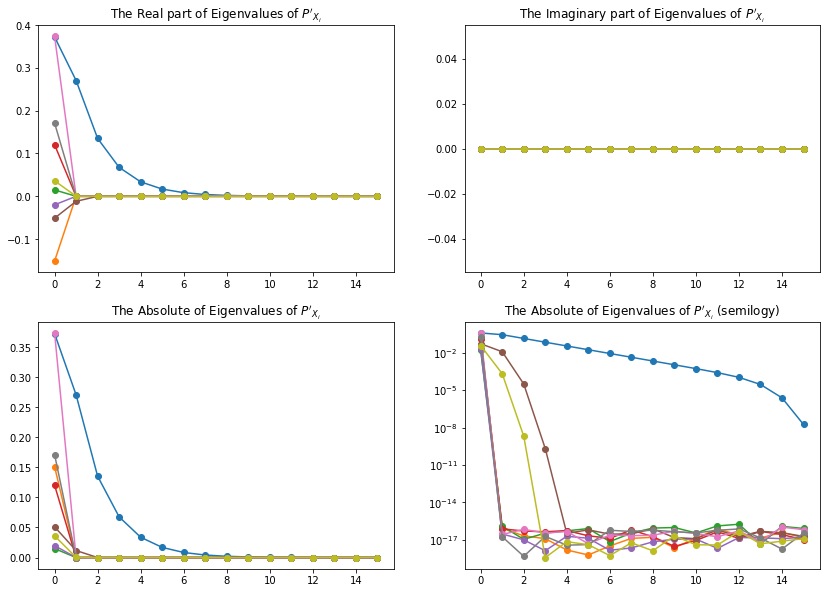

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(coeffi.shape[0]):
    ax1.plot(np.real(coeffi[i,:]),'-o')
    ax2.plot(np.imag(coeffi[i,:]),'-o')
    ax3.plot(np.abs(coeffi[i,:]),'-o')
    ax4.semilogy(np.abs(coeffi[i,:]),'-o')

In [7]:
# X_{i}에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['Xs'])):
    d, ev = nla.eig(Ss['Xs'][i])
    Ds.append(d)
    EVs.append(ev)

for i in range(len(Ds)):
    print(Ds[i])
    print(EVs[i])

[0. 0. 0.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[ 0.499925   -0.21500364 -0.05607727]
[[-0.57735027 -0.72504538  0.2261679 ]
 [-0.57735027  0.24383514 -0.97017407]
 [-0.57735027  0.64409132  0.08723737]]
[ 0.74988749 -0.2259506  -0.05625443]
[[-0.57735027 -0.72504538  0.2261679 ]
 [-0.57735027  0.24383514 -0.97017407]
 [-0.57735027  0.64409132  0.08723737]]
[ 0.87486872 -0.22597913 -0.05625443]
[[-0.57735027 -0.72504538  0.2261679 ]
 [-0.57735027  0.24383514 -0.97017407]
 [-0.57735027  0.64409132  0.08723737]]
[ 0.93735928 -0.22597913 -0.05625443]
[[-0.57735027 -0.72504538  0.2261679 ]
 [-0.57735027  0.24383514 -0.97017407]
 [-0.57735027  0.64409132  0.08723737]]
[ 0.96860448 -0.22597913 -0.05625443]
[[-0.57735027 -0.72504538  0.2261679 ]
 [-0.57735027  0.24383514 -0.97017407]
 [-0.57735027  0.64409132  0.08723737]]
[ 0.98422689 -0.22597913 -0.05625443]
[[-0.57735027 -0.72504538  0.2261679 ]
 [-0.57735027  0.24383514 -0.97017407]
 [-0.57735027  0.64409132  0.08723737]]
[ 0.99203774 -0.

In [8]:
for i in range(len(EVs)-1):
    Pre, Nex = EVs[i], EVs[i+1]
    for j in range(Pre.shape[1]):
        if np.sign(np.real(Pre[0,j])) != np.sign(np.real(Nex[0,j])):
            Nex[:,j] = -Nex[:,j]
    print(nla.norm(Pre - Nex, 'fro'))

2.3467945117515994
6.461745986520615e-16
1.2906342661267445e-15
6.413880542394858e-16
1.1490942388994425e-15
1.2088819800960863e-15
9.98043569808993e-16
5.410557748946589e-16
1.289439925312343e-15
9.163544378420584e-16
1.5927444624756563e-15
7.688094041649352e-16
6.65699992641958e-16
5.783891694525952e-16
2.1972530998020967e-15
1.600524732401678e-15


In [9]:
B = np.zeros(A.shape)
B = B.astype(np.complex128)
for i in range(A.shape[0]):
    B[i,:,:] = np.dot(A[i,:,:], EVs[-1])
if np.sum(np.iscomplex(B)) == 0:
    B = B.astype(np.float64)
B

c:\users\saibi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([[[ 0.19243084, -0.19858359,  0.01343635],
        [ 0.19243084,  0.06678431, -0.05763683],
        [ 0.19243084,  0.17641098,  0.00518266]],

       [[-0.38491942, -0.92362896,  0.23960425],
        [-0.38491942,  0.31061945, -1.02781089],
        [-0.38491942,  0.8205023 ,  0.09242004]],

       [[ 0.19248858, -0.19851108,  0.01341373],
        [ 0.19248858,  0.06675993, -0.05753981],
        [ 0.19248858,  0.17634657,  0.00517394]]])

In [10]:
BSs = shf.NewtonPoly(B)

In [11]:
d, v = nla.eig(BSs['sol'])
BSs['sol'][abs(BSs['sol']) < 1e-15] = 0
d[abs(d) < 1e-15] = 0
v[abs(v) < 1e-15] = 0
print(BSs['sol'])
print(d)
print(v)

[[ 0.99970006  0.          0.        ]
 [ 0.         -0.22597913  0.        ]
 [ 0.          0.         -0.05625443]]
[ 0.99970006 -0.22597913 -0.05625443]
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
